<a href="https://colab.research.google.com/github/leticiaram/EPE_2024/blob/main/EPE_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes

In [59]:
import networkx as nx
import matplotlib.pyplot as plt


 **Red ejemplo: club de karate de Zachary**

Una de las redes listas para usar disponibles en NetworkX: "el club de karate de Zachary"(Zachary, 1977). Esta red representa las amistades (arcos) entre miembros (nodos) de un club de karate estudiado entre 1970 y 1972. Este club de karate en particular ha sido de interés durante mucho tiempo para los sociólogos y científicos de la red, porque finalmente se dividió en dos clubes diferentes después de un desacuerdo entre el instructor y el presidente del club (esto podría explicar por qué no hay estudios famosos sobre clubes de resolución de conflictos). En el estudio original, Zachary usó la estructura de la red para predecir qué miembros se unirían a cuál de los dos clubes con una precisión casi perfecta. Específicamente, usó el algoritmo de corte mínimo. En el artículo de Zachary, el nodo con el ID 0 se identificó como el instructor del club.


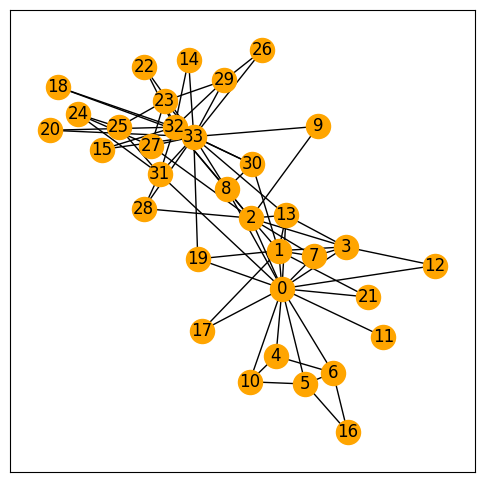

In [60]:
G = nx.karate_club_graph()
plt.figure(1,figsize=(6,6))
nx.draw_networkx(G,node_color="orange")

## Nodos y Aristas

In [ ]:
list(G.nodes)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
list(G.edges)[0:10]

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11)]

##Diametro

In [ ]:
nx.diameter(G)

5

## Coeficiente de agrupamiento

In [ ]:
nx.clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 9: 0,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 14: 1.0,
 15: 1.0,
 16: 1.0,
 17: 1.0,
 18: 1.0,
 19: 0.3333333333333333,
 20: 1.0,
 21: 1.0,
 22: 1.0,
 23: 0.4,
 24: 0.3333333333333333,
 25: 0.3333333333333333,
 26: 1.0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 29: 0.6666666666666666,
 30: 0.5,
 31: 0.2,
 32: 0.19696969696969696,
 33: 0.11029411764705882}

In [ ]:
nx.average_clustering(G)

0.5706384782076823

## Centralidad

De grado

In [ ]:
G.degree

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

<BarContainer object of 11 artists>

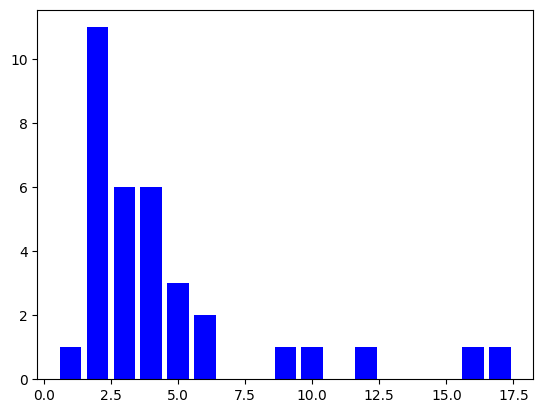

In [ ]:
degree_sequence=sorted([d for n,d in G.degree()], reverse=True)
import collections
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

In [ ]:
max(G.degree)

(33, 17)

## Eigen centralidad

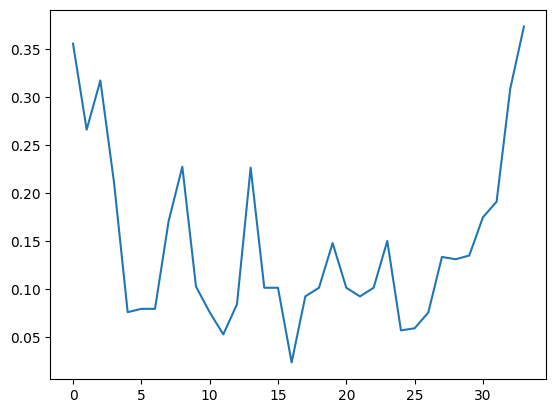

In [ ]:
ec=nx.eigenvector_centrality(G, max_iter=10000)
lists = sorted(ec.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)

In [ ]:
max(nx.eigenvector_centrality(G, max_iter=10000))

33

## Asortatividad

In [ ]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

## Redes Aleatorias

### Erdos-Renyi I G(n,m)

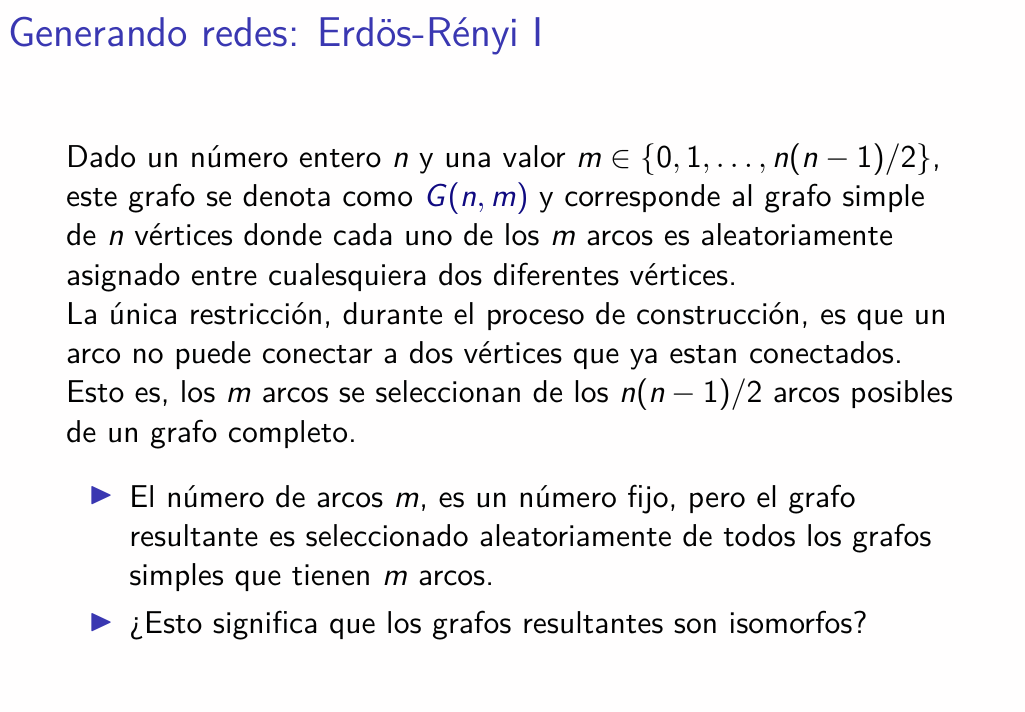

In [ ]:
n = 10  # vertices
m = 20  # arcos
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnm_random_graph(n, m, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 9 5 6
1 4 7 8 6 2
2 4 5 7
3 5 4 6 9
4 9 7
5 7
6
7 8
8 9
9


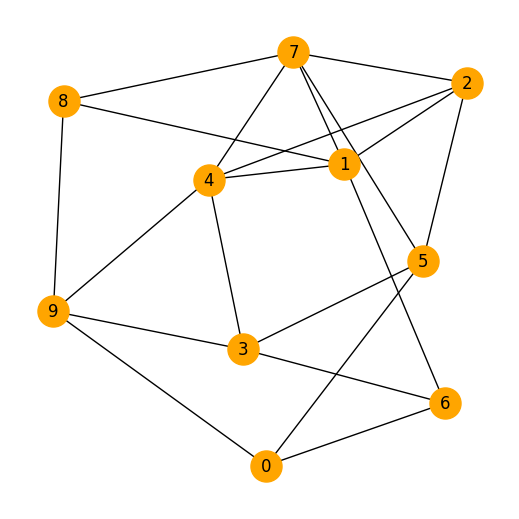

In [ ]:
plt.figure(1,figsize=(5,5))
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
nx.draw(G, with_labels=True,node_color="orange",pos=pos,node_size=500)
plt.show()

In [ ]:
print("Matriz de Adyacencias")
#nx.adjacency_matrix(G)
A=nx.to_numpy_array(G)
A

Matriz de Adyacencias


array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 1.],
       [0., 1., 1., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.]])

### Erdos-Renyi II  G(n,p)

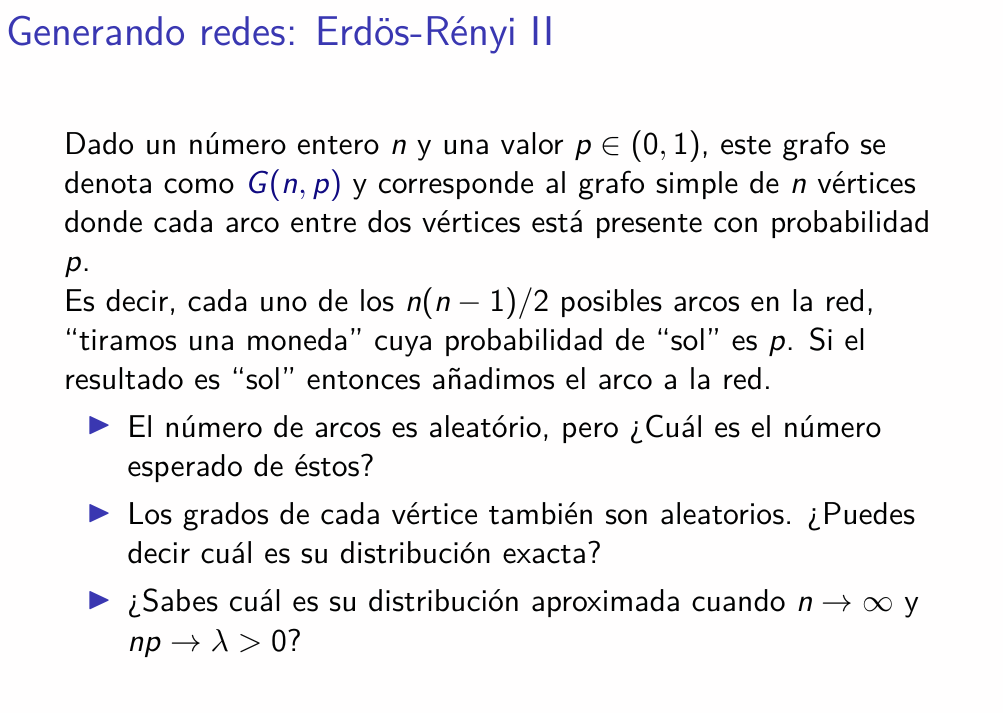

In [ ]:
n = 10  # vertices
p = 0.5  # probability
seed = 2016  # semilla para generador de números aleatorios

G = nx.gnp_random_graph(n, p, seed=seed)

print("Lista de Adyacencias")
for line in nx.generate_adjlist(G):
    print(line)

Lista de Adyacencias
0 2 5 8 9
1 2 3 4 5 6 7 8 9
2 3 5 7
3 5 7 8
4 5 7 9
5 8
6 7 8
7 8
8 9
9


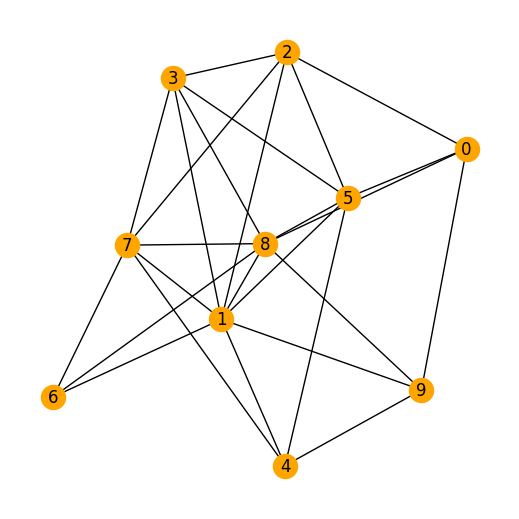

In [ ]:
pos = nx.spring_layout(G, seed=seed)  #para mantener la misma posición
plt.figure(1,figsize=(5,5))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Barabasi-Albert

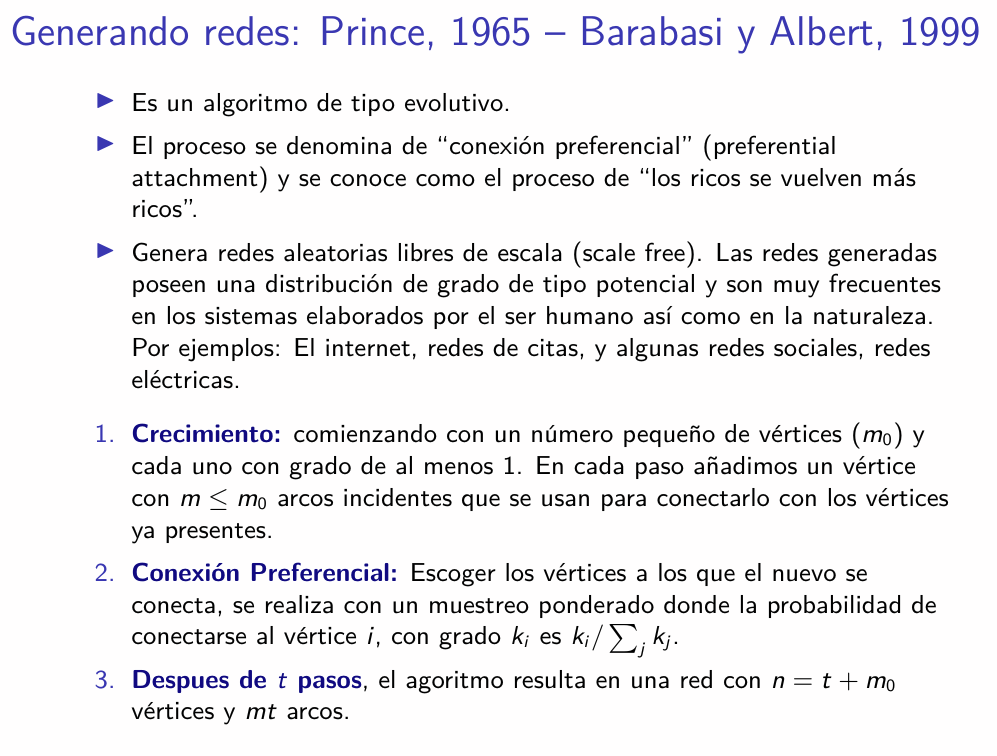

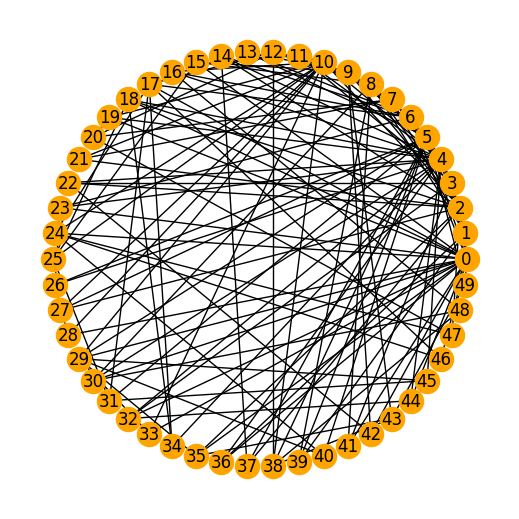

In [ ]:
n = 50  # nodos
m = 3  # numero de arcos vertices de cada nuevo nodo
seed = 2016  # semilla para generador de números aleatorios

G = nx.barabasi_albert_graph(n, m, seed=seed)
pos = nx.circular_layout(G)  # posicion circular
plt.figure(1,figsize=(5,5))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Watts-Strogatz

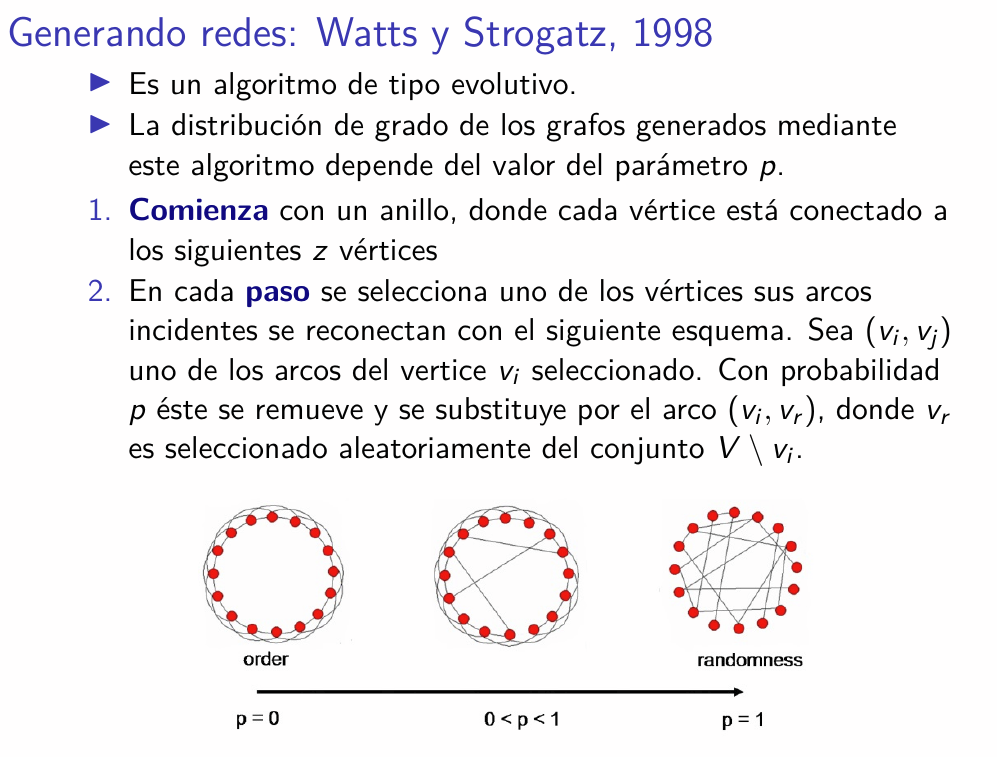

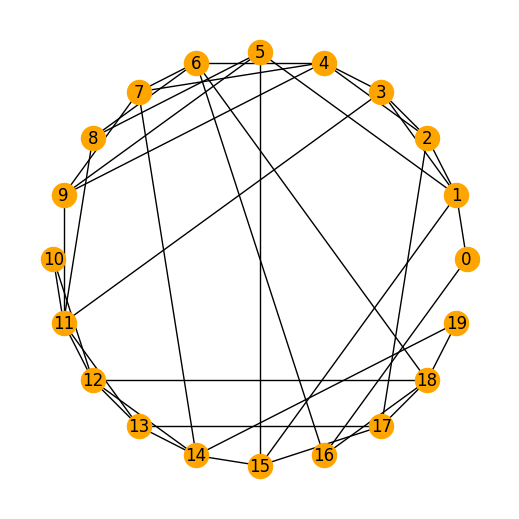

In [ ]:
n = 20  # vertices
k = 4   # número de vecionos más cercanos a los que está conectado
p = 0.3   # probabilidad de reconexión
seed = 2016  # semilla para generador de números aleatorios

G = nx.watts_strogatz_graph(n, k, p,seed=seed)


plt.figure(1,figsize=(5,5))
pos = nx.circular_layout(G)  # posición circular
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

### Modelo de Configuración para generar redes

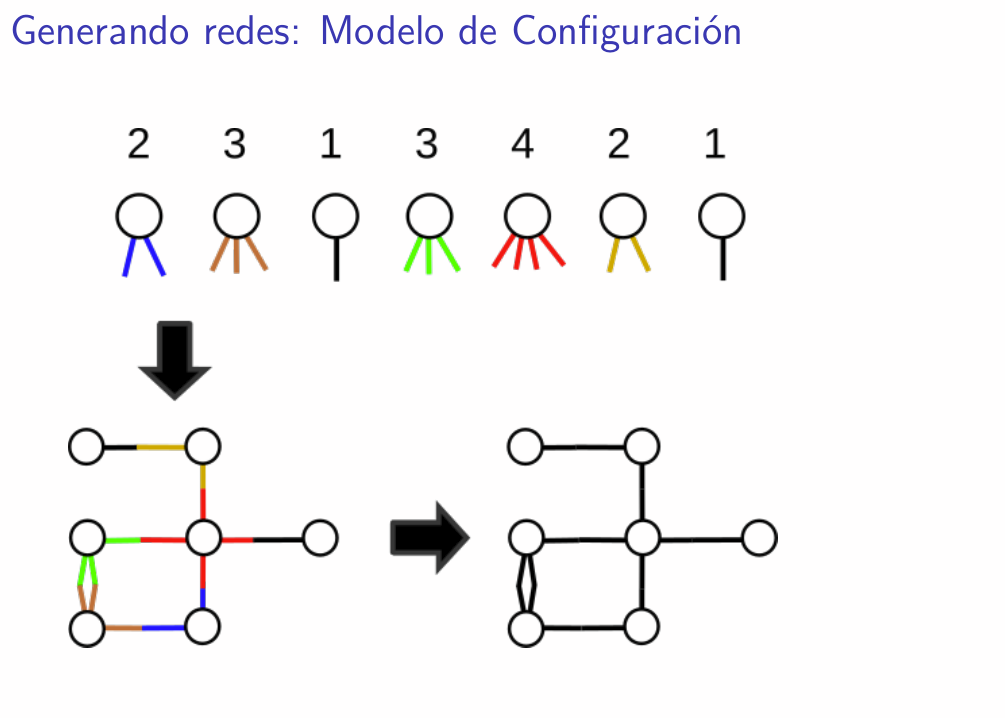

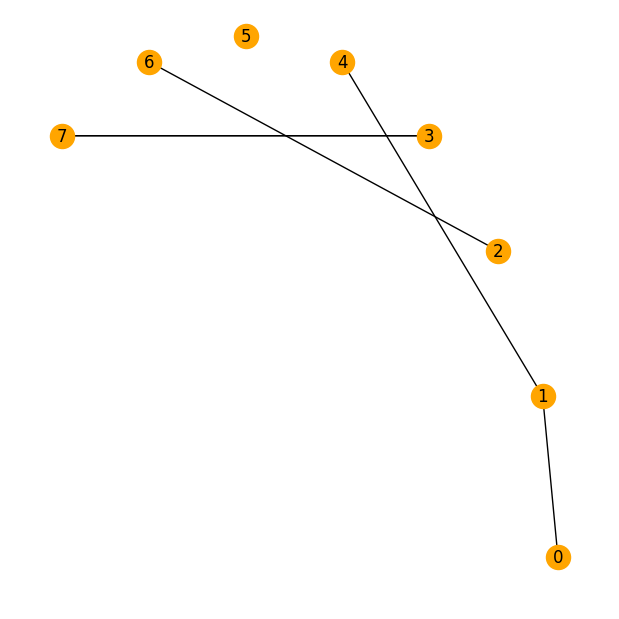

In [ ]:
ks=[1,2,1,2,1,0,1,2]
G = nx.configuration_model(ks)
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=True,node_color="orange",pos=pos)
plt.show()

In [ ]:
import numpy as np
np.random.seed(4)
k = np.random.poisson(5, 100)  #generamos 100 vertices con grado Poisson(5)
print("Sucesión de Grados")
print(k)
sg = k.tolist()
print("La suma de grados debe ser par")
print(sum(sg))
G = nx.configuration_model(sg)

Sucesión de Grados
[ 7  6  1  5  4  6  8  7  5  9  6  5  7  6  5  8  2 11  2  7  4  8  4  7
  5  7  3  4  8  5  4  4  5 11  4  3  5  4  3  3  5  6  5  8  7  5  7  3
  3  3  4  8  6  6  2  3  3  9  9  6 11  3  3  5  3  7  5  5  5  4  8  3
  8  6 11  6  8  9  3  4  2  1  4  6  1  7  6  2  7  7  7  1  5  4  3  5
  2  1  6  2]
La suma de grados debe ser par
522


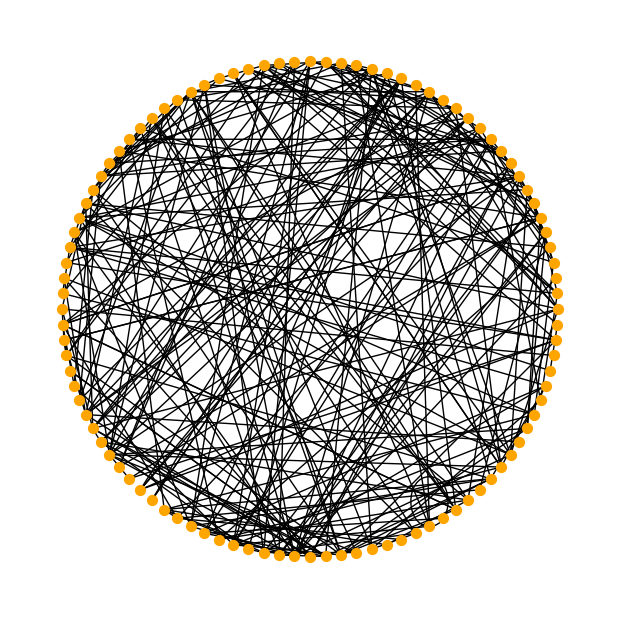

In [ ]:
plt.figure(1,figsize=(6,6))
nx.draw(G, with_labels=False,node_color="orange",pos=nx.circular_layout(G),node_size=50)

<BarContainer object of 10 artists>

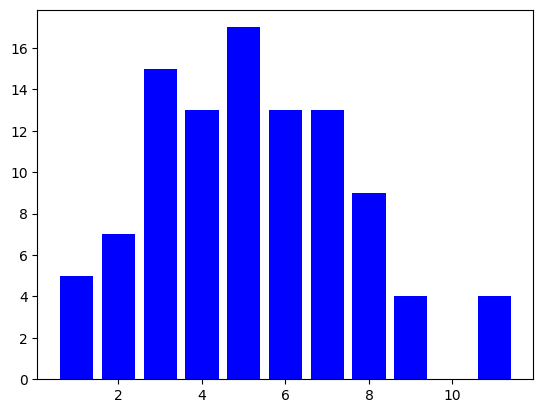

In [ ]:
degree_sequence = sorted([d for n,d in G.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color='b')

# Modelo Epidemiológico

In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

## SEIR

In [61]:
# Modelo en términos de ODEs
def ode_SEIR(t, y, beta, delta, gamma):
    Y = np.zeros((4))
    Y[0] = - beta * y[0] * y[2]
    Y[1] = beta * y[0] * y[2] - delta * y[1]
    Y[2] = delta * y[1] - gamma * y[2]
    Y[3] = gamma * y[2]
    return Y

Especificamos parámetros y condiciones iniciales

In [62]:
beta = 1.42/1e6
delta = 2.0
gamma = 0.142

S0 = 1e6
E0 = 0.0
I0 = 1
y0 = (S0, E0, I0, 0.0)

t_start = 0.0;
t_end = 70.0;

In [63]:
# Resolvemos usando odeint de scipy
SOL = spi.solve_ivp(ode_SEIR, [t_start, t_end], y0, args = (beta, delta, gamma))

Text(0, 0.5, 'Número de personas')

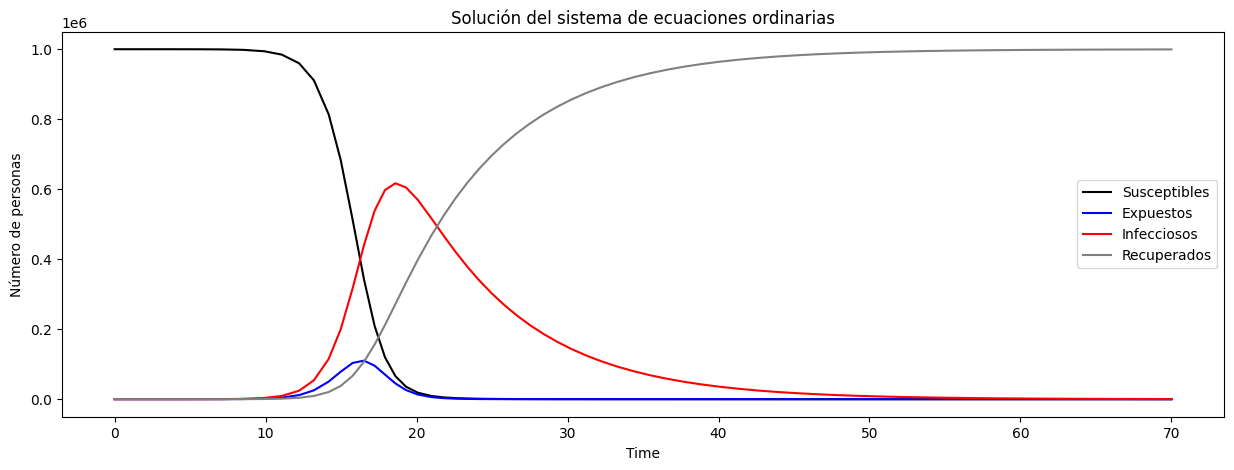

In [64]:
pl.figure(figsize=(15, 5))

pl.plot(SOL.t,SOL.y[0], '-k', label='Susceptibles')
pl.plot(SOL.t,SOL.y[1], '-b', label='Expuestos')
pl.plot(SOL.t,SOL.y[2], '-r', label='Infecciosos')
pl.plot(SOL.t,SOL.y[3], 'gray', label='Recuperados')
pl.legend(loc=0)
pl.title('Solución del sistema de ecuaciones ordinarias')
pl.xlabel('Time')
pl.ylabel('Número de personas')


## SIR

In [69]:
# Modelo en términos de ODEs
def ode_SIR(t, y, beta, gamma):
    Y = np.zeros((3))
    Y[0] = - beta * y[0] * y[1]
    Y[1] = beta * y[0] * y[1] - gamma * y[1]
    Y[2] = gamma * y[1]
    return Y

In [70]:
beta = 1.42/1e6
gamma = 0.142

S0 = 1e6
I0 = 1
y0 = (S0, I0, 0.0)

t_start = 0.0;
t_end = 70;

In [73]:
# Resolvemos usando odeint de scipy
t_eval = np.linspace(0,t_end, 100)
SOL = spi.solve_ivp(ode_SIR,  [t_start, t_end], y0, t_eval = t_eval, args = (beta, gamma))

Text(0, 0.5, 'Número de personas')

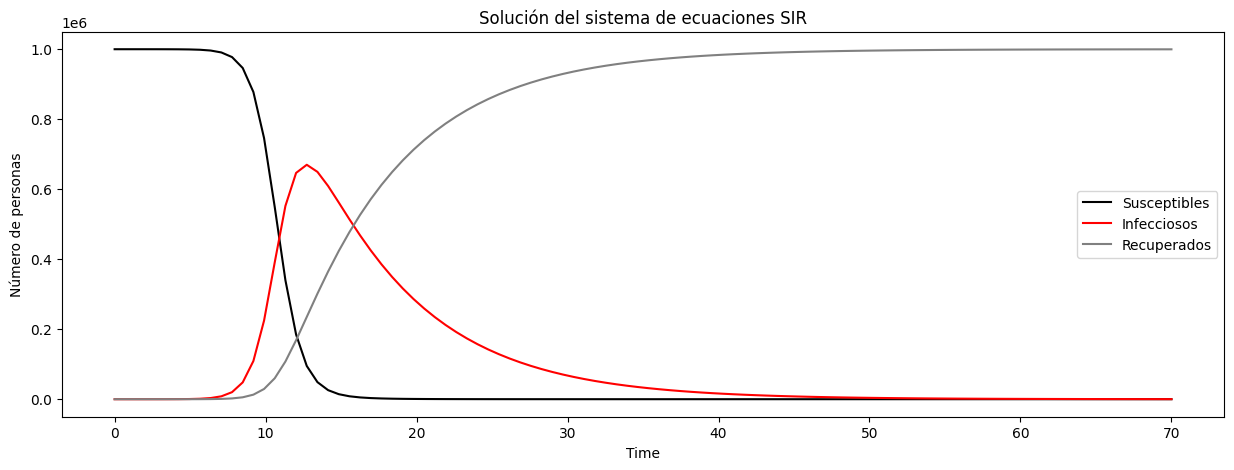

In [74]:
pl.figure(figsize=(15, 5))

pl.plot(SOL.t,SOL.y[0], '-k', label='Susceptibles')
pl.plot(SOL.t,SOL.y[1], '-r', label='Infecciosos')
pl.plot(SOL.t,SOL.y[2], 'gray', label='Recuperados')
pl.legend(loc=0)
pl.title('Solución del sistema de ecuaciones SIR')
pl.xlabel('Time')
pl.ylabel('Número de personas')

#Simulación exacta markoviana

## Simulación de proceso markoviano con acción de masas

In [9]:
!pip install gillespie

In [10]:
import gillespie
import matplotlib.pyplot as plt

In [39]:
N = 1000      # Tamaño de población
beta = 2     # Tasa de transmisión
gamma = 0.5  # Tasa de recuperación
t_obs = 15       # Tiempo de observación

I0 = 3
initials = [N - I0, I0, 0]  # S, I, R

propensities = [lambda s, i, r: beta * s * i / N,  # S -> I, Propensity: b * S(t) * I(t) / N
               lambda s, i, r: gamma * i]          # I -> R Propensity: g * I(t)
stoichiometry = [[-1, 1, 0],  # S -> I, Population change: S-1, I+1, R+0
                 [0, -1, 1]]  # I -> R Population change: S+0, I-1, R+1

t, SIR = gillespie.simulate(initials, propensities, stoichiometry, t_obs)
S, I, R = zip(*SIR)

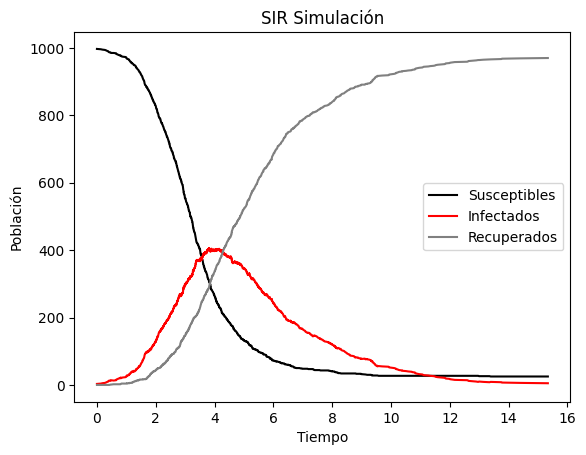

In [51]:
plt.plot(t, S, '-k', label="Susceptibles")
plt.plot(t, I, '-r', label="Infectados")
plt.plot(t, R, 'gray', label="Recuperados")

plt.title("SIR Simulación")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.legend()

In [41]:
y0 = ((N - I0)/N, I0/N, 0)

t_start = 0.0;
t_end = 15.0;

In [44]:
# Resolvemos usando odeint de scipy
t_eval = np.linspace(0, t_end, 100)
SOL = spi.solve_ivp(ode_SIR,  [t_start, t_end], y0, t_eval = t_eval,args = (beta, gamma))

Text(0, 0.5, 'Número de personas')

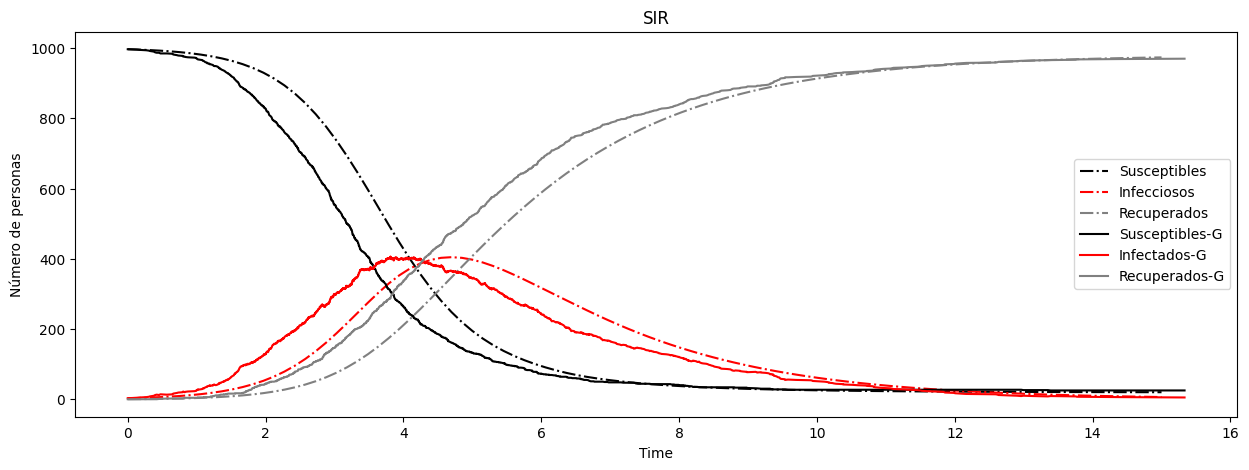

In [57]:
pl.figure(figsize=(15, 5))

pl.plot(SOL.t,SOL.y[0]*N, '-.k', label='Susceptibles')
pl.plot(SOL.t,SOL.y[1]*N, '-.r', label='Infecciosos')
pl.plot(SOL.t,SOL.y[2]*N,  linestyle='-.', color='gray', label='Recuperados')

plt.plot(t, S, '-k', label="Susceptibles-G")
plt.plot(t, I, '-r', label="Infectados-G")
plt.plot(t, R, 'gray', label="Recuperados-G")

pl.legend(loc=0)
pl.title('SIR')
pl.xlabel('Time')
pl.ylabel('Número de personas')

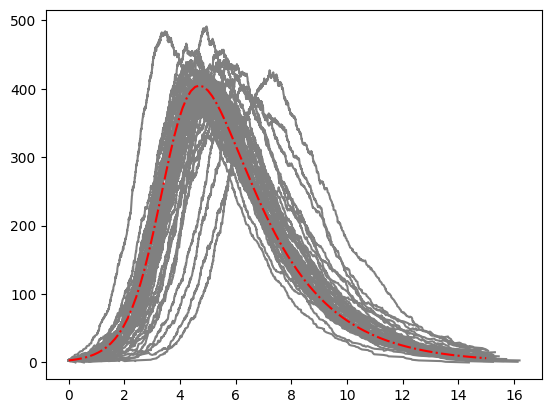

In [58]:
rep = 50

for i in range(rep):
  t, SIR = gillespie.simulate(initials, propensities, stoichiometry, t_obs)
  S, I, R = zip(*SIR)
  plt.plot(t, I, 'gray', label="Infectados-G")

pl.plot(SOL.t,SOL.y[1]*N, '-.r', label='Infecciosos')

## Simulación de proceso markoviano en redes

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx

In [ ]:
def Monte_Carlo_Step_exp(Lambdas,dict_num_contacts,X_I_indexes):
    Lambda=np.sum(Lambdas)
    tau=np.random.exponential(scale=1/Lambda)
    u_2=np.random.uniform(0,1)
    if(u_2<(Lambda-Lambdas[-1])/Lambda):#Infeccion
        u_3=np.random.uniform(0,1)
        D=0
        k=0
        while(u_3>D):
            D+=Lambdas[k]/(Lambda-Lambdas[-1])
            k+=1
        new_reaction_index=np.random.choice(range(len(dict_num_contacts[str(k-1)])))
        new_reaction=dict_num_contacts[str(k-1)][new_reaction_index]
    else:                     #Recuperación
        k=0
        new_reaction_index=np.random.choice(range(len(X_I_indexes)))
        new_reaction=X_I_indexes[new_reaction_index]
    return tau,new_reaction,k-1,new_reaction_index

def SIR_Gillespie_Direct_Method_Network(beta,gamma, N, X_I_indexes, G_network_initial=nx.Graph(), T=np.inf):
    flag=True
    #Paso 1.
    t=0 #Inicializar .
    #Calcular  el número de contactos infecciosos del individuo .--
    X_I=len(X_I_indexes)
    X_S=N-X_I
    Historia=[[0,X_S,X_I]]
    dict_num_contacts = {}
    for n in range(X_I+1):
        dict_num_contacts[str(n)]=[]
    num_cont_inf_por_indice=np.zeros(N)
    for i in range(N):
        if(i not in X_I_indexes): #No es infeccioso.
            count_for_i=0
            for j in X_I_indexes:
                if (G_network_initial.has_edge(i,j)):#Es un contacto Susceptible-infeccioso.
                    num_cont_inf_por_indice[i]+=1#Ya que voy a hacer los ciclos, mejor la guardo igual.
                    count_for_i+=1
            dict_num_contacts[str(count_for_i)].append(i)

    while(flag):
        #Generar las Lambdas--
        Lambda=0
        Lambdas=[]
        for k in range(len(list(dict_num_contacts.keys()))):
            Lambdas.append((beta/N)*len(dict_num_contacts[str(k)])*k)#
            Lambda+=Lambdas[-1]
        Lambdas.append(gamma*X_I)
        Lambda+=Lambdas[-1]

        #Paso Monte-Carlo---------------------------
        tau,new_reaction,k_choice,new_reaction_index=Monte_Carlo_Step_exp(Lambdas,dict_num_contacts,X_I_indexes)

        #Actualización del sistema.
        if(G_network_initial.nodes[new_reaction]['Estado:']=='Susceptible'):#Se trata de una infección
            num_cont_inf_por_indice[new_reaction]=0
            G_network_initial.nodes[new_reaction]['Estado:']='Infeccioso'   #Actualizar su estado
            X_I_indexes.append(new_reaction)
            i=new_reaction
            dict_num_contacts[str(k_choice)].pop(new_reaction_index) #Saca al nuevo infeccioso del conjunto con
            #exactamente k_choice contactos infecciosos.
            #Para cada nodo  conectado a , actualizamos su número de contactos infecciosos como --
            num_max_cont=int(list(dict_num_contacts.keys())[-1])
            for vecino in G_network_initial.neighbors(i):         #Para cada vecino del nuevo infectado,
            #le aumentamos el numero de contactos en 1. (lo agregamos a la sig. categoria y lo sacamos de la anterior)
                if (G_network_initial.nodes[vecino]['Estado:']=='Susceptible'):

                    num_cont_del_vecino=num_cont_inf_por_indice[vecino]
                    if(num_cont_del_vecino+1>num_max_cont): #Si mas de uno crea una categoria, hay error.
                        num_max_cont+=1
                        dict_num_contacts[str(int(num_cont_del_vecino+1))]=[vecino]
                    else:
                        dict_num_contacts[str(int(num_cont_del_vecino+1))].append(vecino)
                    dict_num_contacts[str(int(num_cont_del_vecino))].remove(vecino)
                    num_cont_inf_por_indice[vecino]+=1   #Actualizamos ambas fuentes de informacion
        else:
            G_network_initial.nodes[new_reaction]['Estado:']='Recuperado'
            num_cont_inf_por_indice[new_reaction]=0      #Ya no es relevante
            X_I_indexes.pop(new_reaction_index)
            i=new_reaction
            #Para cada nodo  conectado a  actualizamos su número de contactos infecciosos como
            for vecino in G_network_initial.neighbors(i): #Podria ser que ya no tuviera ningun contacto
                num_cont_del_vecino=num_cont_inf_por_indice[vecino]
                if(num_cont_del_vecino!=0):# Es recuperado.
                    dict_num_contacts[str(int(num_cont_del_vecino-1))].append(vecino)
                    dict_num_contacts[str(int(num_cont_del_vecino))].remove(vecino)
                    num_cont_inf_por_indice[vecino]-=1    #Actualizamos ambas fuentes de informacion
        t+=tau #Actualiza el tiempo .
        X_I=len(X_I_indexes)
        X_S=N-X_I
        Historia.append([t,X_S,X_I])#Focus
        if(X_I==0 or t>T):
            flag=False
    return pd.DataFrame(Historia,columns=['time','S(t)','I(t)'])

Ejemplo

In [ ]:
import time
start_time = time.time()
N=10**4
ksum=1
np.random.seed(0)
while(ksum%2!=0):#Que defina una grafica.
        k_dist=np.random.choice(a=[1,5,25],size=N,p=[25/31,5/31,1/31])
        ksum=sum(k_dist)
G = nx.random_degree_sequence_graph(k_dist)
#pos=nx.spring_layout(G,seed=2,k=3)
print("--- %s Segundos para crear la gráfica ---" % (time.time() - start_time))

--- 41.29706382751465 Segundos para crear la gráfica ---


In [ ]:
beta = 0.6
gamma = 1.0
I_0 = 0.01

num_sims=20

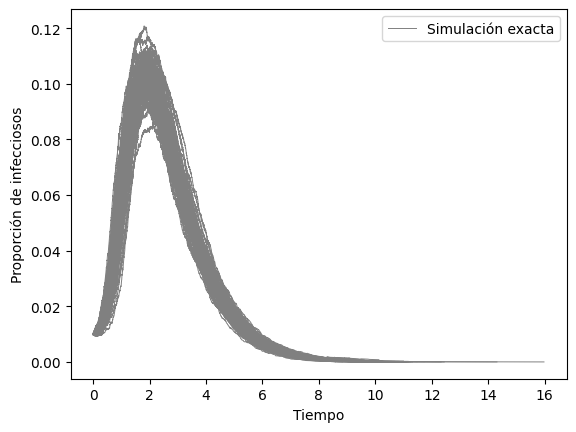

In [ ]:
for iter in range(num_sims):
    X_I_indexes = np.random.choice(range(N), size = int(I_0*N), replace = False)
    for k in range(N):
        if k in X_I_indexes:
            G.nodes[k]['Estado:'] ='Infeccioso'
        else:
            G.nodes[k]['Estado:'] ='Susceptible'
    iter_time = time.time()
    H = []
    while(len(H) < 100):
        G_copy = G.copy()
        X_I_indexes_copy = X_I_indexes.copy().tolist()
        H=SIR_Gillespie_Direct_Method_Network(beta = beta*(N-1), gamma=gamma, N = N, X_I_indexes = X_I_indexes_copy, G_network_initial = G_copy, T = 10)
    if(iter == 0):
      plt.plot(H['time'], H['I(t)']/N,'gray', linewidth = 0.7, label = 'Simulación exacta')
    else:
      plt.plot(H['time'], H['I(t)']/N,'gray', linewidth = 0.7)
plt.ylabel('Proporción de infecciosos')
plt.xlabel('Tiempo')
#plt.plot(t,1-psi(sol_2[:,0])-sol_2[:,1],'black',label='EBCM')
plt.legend()
plt.show()